In [1]:
# https://drive.google.com/open?id=1ngv0KTuqCOIxUJ-62vHXzvqrzmre6hw-
import glob
import pandas as pd
df = pd.DataFrame(columns=["path", "target"])
for fn in glob.glob("./train/cat.*.jpg"):
    s = pd.Series([fn, 0], index=["path", "target"])
    df = df.append(s, ignore_index=True)
for fn in glob.glob("./train/dog.*.jpg"):
    s = pd.Series([fn, 1], index=["path", "target"])
    df = df.append(s, ignore_index=True)
df

,path,target
0,./train\cat.0.jpg,0
1,./train\cat.1.jpg,0
2,./train\cat.10.jpg,0
3,./train\cat.100.jpg,0
4,./train\cat.1000.jpg,0
5,./train\cat.10000.jpg,0
6,./train\cat.10001.jpg,0
7,./train\cat.10002.jpg,0
8,./train\cat.10003.jpg,0
9,./train\cat.10004.jpg,0


Using TensorFlow backend.


SIZE: (423, 421)


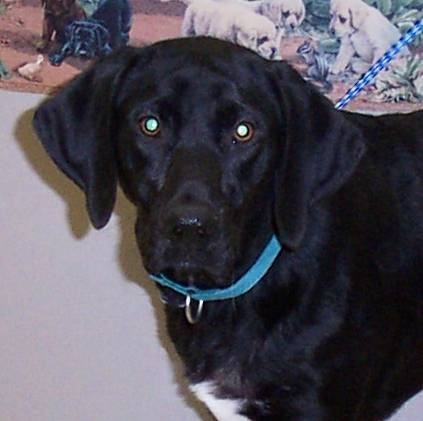

In [2]:
import random
c = random.randint(0, 24999)
from keras.preprocessing.image import load_img
img = load_img(df.iloc[c]["path"])
print("SIZE:", img.size)
img

SIZE: (224, 224)


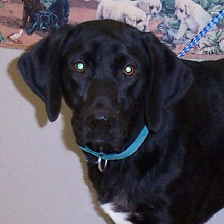

In [3]:
img = load_img(df.iloc[c]["path"], target_size=(224, 224))
print("SIZE:", img.size)
img

In [4]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
vgg = VGG16(include_top=False, input_shape=(224, 224, 3))
for l in vgg.layers:
    l.trainable = False
x = BatchNormalization()(vgg.output)
x = Flatten()(x)
x = Dense(units=2048, activation="relu")(x)
x = Dropout(0.25)(x)
x = Dense(units=256, activation="relu")(x)
x = Dropout(0.25)(x)
x = Dense(units=2, activation="softmax")(x)
cnn = Model(inputs=vgg.input, outputs=x)
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [5]:
cnn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [6]:
#預處理一下
import numpy as np
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(np.array(df["path"]), 
                                                    np.array(df["target"]), 
                                                    test_size=0.1)
# y->One-hot
from keras.utils import np_utils
y_train_cat = np_utils.to_categorical(y_train)
y_test_cat = np_utils.to_categorical(y_test)

In [7]:
# DEMO: x: 預處理要跟當初設計模型的預處理一模一樣
from keras.applications.vgg16 import preprocess_input
preprocess_input(np.array(load_img(x_train[0])))

array([[[ 96.061   ,  95.221   ,  92.32    ],
        [105.061   , 104.221   , 101.32    ],
        [114.061   , 113.221   , 110.32    ],
        ...,
        [ 65.061   ,  58.221   ,  40.32    ],
        [ 65.061   ,  58.221   ,  40.32    ],
        [ 64.061   ,  59.221   ,  41.32    ]],

       [[106.061   , 105.221   , 102.32    ],
        [101.061   , 100.221   ,  97.32    ],
        [ 98.061   ,  97.221   ,  94.32    ],
        ...,
        [ 56.060997,  51.221   ,  34.32    ],
        [ 57.060997,  52.221   ,  35.32    ],
        [ 58.060997,  54.221   ,  37.32    ]],

       [[100.061   ,  99.221   ,  96.32    ],
        [ 96.061   ,  95.221   ,  92.32    ],
        [ 94.061   ,  93.221   ,  90.32    ],
        ...,
        [ 57.060997,  55.221   ,  40.32    ],
        [ 58.060997,  58.221   ,  43.32    ],
        [ 61.060997,  61.221   ,  46.32    ]],

       ...,

       [[116.061   , 113.221   , 116.32    ],
        [108.061   , 105.221   , 108.32    ],
        [111.061   , 1

In [11]:
times = 5
batch = 20
for t in range(times):
    idx = np.random.randint(0, len(x_train), batch)
    xs = []
    ys = y_train_cat[idx]
    for p in x_train[idx]:
        img = load_img(p, target_size=(224, 224, 3))
        img = preprocess_input(np.array(img))
        xs.append(img)
    loss = cnn.train_on_batch(np.array(xs), ys)
    print("----- times:", t, " -----")
    print(loss)

----- times: 0  -----
[1.6968048, 0.85]
----- times: 1  -----
[1.2266144, 0.85]
----- times: 2  -----
[2.9752593, 0.8]
----- times: 3  -----
[0.047116466, 0.95]
----- times: 4  -----
[1.1920929e-07, 1.0]


In [33]:
idx = np.random.randint(0, len(x_test), 200)
orixs = []
xs = []
oriys = y_test[idx]
ys = y_test_cat[idx]
for p in x_test[idx]:
    img = load_img(p, target_size=(224, 224, 3))
    orixs.append(img)
    img = preprocess_input(np.array(img))
    xs.append(img)
cnn.evaluate(np.array(xs), ys)

200/200 [==============================] - 38s 191ms/step


[1.323268165588379, 0.895]

In [34]:
pre = cnn.predict(np.array(xs)).argmax(axis=-1)

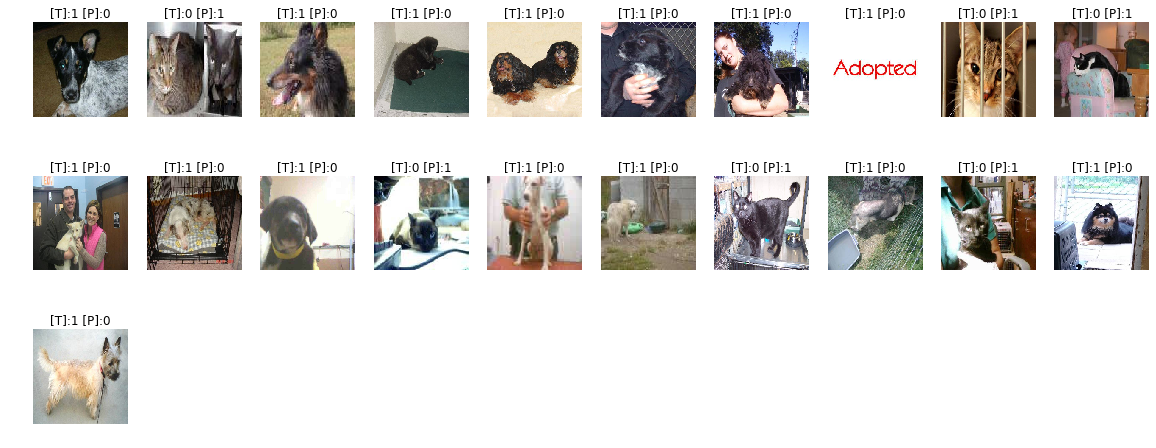

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
pre_false = []
ans_false = []
img_false = []

for (index, p) in enumerate(pre):
    if not p == oriys[index]:
        pre_false.append(p)
        ans_false.append(oriys[index])
        img_false.append(orixs[index])

        
width = 10
height = int(len(pre_false) / width) + 1
plt.figure(figsize=(20, 8))
for (index, img) in enumerate(img_false):
    plt.subplot(height, width, index + 1)
    # T原始答案　P預測答案
    t = "[T]:" + str(ans_false[index]) + " [P]:" + str(pre_false[index])
    plt.title(t)
    plt.axis("off")
    plt.imshow(img)

In [40]:
cnn.save("dogvscat.h5")

In [41]:
# https://support.hdfgroup.org/products/java/release/download.html
from keras.models import load_model
lmodel = load_model("dogvscat.h5")
lmodel.evaluate(np.array(xs), ys)

200/200 [==============================] - 38s 191ms/step


[1.323268165588379, 0.895]